# Microsoft Studios - Movie Analysis

## Abstract:

If we only were able to create one movie, what type of movie should that be? (Because this idea runs along the thought process that for the first movie, there will be only so much resources to invest into this. We need to 
choose a type of movie to make that will have the best chance for success.)

Maybe include visual representative of Abstract.

## Introduction:

Microsoft is thinking about diversifying and has decided on a new business venture, Microsoft Studios. The challenge Microsoft Studios faces is that it is relatively new to movie industry, being predominantly a great tech company. We have been charged with exploring the types of films doing best at the box office. Provided with this new insight, Microsoft Studios will be able to better assess what type of films to make and the logistics that goes along with large movie productions.

## Business Question:

What type movies should the new Microsoft Studios make?

## Data Questions:

1. Movies with high ratings fall into what movie genre?


2. What movie genre generated the most profit (ROI)?



## Data - Importing & Cleaning:

###### Ratings:Genre Data - title.basics.csv and title.ratings.csv - Cleaning & Creating Joined Dataframe

This created dataframe that will show genre and the corresponding average ratings for the movies of each genre taken from the information from the above datasets: "title.basics.csv" and "title.ratings.csv".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from bs4 import BeautifulSoup
import requests
import re

##### The following is a function to download via pandas csv, excel, or json files to jupyter notebook:

In [2]:
def files_import_pd(file_path):
    if file_path.endswith("csv"):
        return pd.read_csv(file_path)
    if file_path.endswith("tsv"):
        return pd.read_csv(file_path, sep="\t")
    if file_path.endswith("xlsx"):
        return pd.read_excel(file_path)
    if file_path.endswith("json"):
        return pd.read_json(file_path)
    else:
        print("NOT CSV/TSV/EXCEL/JSON FILE")

In [3]:
df1 = files_import_pd(r"C:\Users\bigbenx3\2021_flatiron\movie_data_sets\title.basics.csv")
df1.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Good. Imported the first dataframe: contains genre data, movie runtime, and year for each movie.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
df1.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [6]:
df2 = files_import_pd(r"C:\Users\bigbenx3\2021_flatiron\movie_data_sets\title.ratings.csv")
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Imported second data frame: contains average ratings data. 

Now to merge the two data frames using the "tconst" similar column.

ASSUMPTION: Column "tconst" is the assumed similar column for both data frames.

In [7]:
df_1and2 = df1.merge(df2)
df_1and2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
df_1and2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Two dataframes merged, uniting data from "title.basics.csv" and "title.ratings.csv". 

NOTE: Half of the data from "title.basics.csv" has been discarded. Merge left all of "title.ratings.csv" entries. (ASSUMPTION)

Because the half of the "df1" did not have ratings data from "title.basics.csv" would not serve to help us relate the performance of each movie by genre and its rating... 

it was acceptable for that data to be omitted.  
The merged data frame, "df_1and2" had over 73,000 ratings entries along with the basic information to use.

Seems we have missing values for df_1and2["runtime_minutes"] and df_1and2["genres"].

Let's see what these missing values look like.

In [9]:
df_1and2.loc[df_1and2.genres.isnull(), :]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
18,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN,6.6,8
29,tt0306058,Second Coming,Second Coming,2012,95.0,NaN,5.5,20
33,tt0326592,The Overnight,The Overnight,2010,88.0,NaN,7.5,24
37,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN,6.2,10
38,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,NaN,6.3,6
...,...,...,...,...,...,...,...,...
73644,tt9742106,The Cat in Their Arms,Neko wa Daku Mono,2018,NaN,NaN,4.5,8
73752,tt9828428,Anjali CBI,Anjali CBI,2019,NaN,NaN,7.6,20
73798,tt9866736,Rise: Ini Kalilah,Rise: Ini Kalilah,2018,NaN,NaN,5.8,11
73805,tt9876160,Koridor bessmertiya,Koridor bessmertiya,2019,125.0,NaN,5.4,45


There is no readily available replacement for the entries with missing genres, or the missing runtime minutes. No information on runtime minutes means we have no way of knowing if that movie was 5 minutes or 90 minutes long. Therefore, we will have to discard them. Cleaning out the nulls.

In [10]:
df_1and2_no_na = df_1and2.dropna()

In [11]:
df_1and2_no_na.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [12]:
df_1and2_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [13]:
df_1and2_no_na["start_year"].value_counts()

2016    7785
2017    7718
2015    7650
2014    7528
2013    7216
2012    6866
2018    6573
2011    6542
2010    6038
2019    1804
Name: start_year, dtype: int64

So, the oldest year is 2010. Merging "df_tn_budgets" with "df_1and2_no_na" would yield movies 2010 and newer.

In [14]:
df_tn_budgets = files_import_pd(r"C:\Users\bigbenx3\2021_flatiron\movie_data_sets\tn.movie_budgets.csv")
df_tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
df_tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
df_1and2_no_na_rename_col = df_1and2_no_na.rename(columns={"primary_title": "movie"})
df_1and2_no_na_rename_col.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [17]:
df_1and2_no_na_rename_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   movie            65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [18]:
df_tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
df_genres_budgets_ratings = df_1and2_no_na_rename_col.merge(df_tn_budgets)
df_genres_budgets_ratings.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183"


In [20]:
df_genres_budgets_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2752 non-null   object 
 1   movie              2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  production_budget  2752 non-null   object 
 11  domestic_gross     2752 non-null   object 
 12  worldwide_gross    2752 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 301.0+ KB


###### So these are our two data frames we will further manipulate:

These are like our controls to test if the combined genres, ratings, and gross data with 2752 entries is to be relied on or should be challenged. If there is a discrepancy between these datasets. This investigation would be ongoing with other datasets. If there is consensus, it helps to establish a bench mark between correlation of genres to gross to ratings, which is very valuable to have.

In [21]:
df_1and2_no_na_rename_col.head() #control

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


And this is our experimental for trying to figure out a possible correlation between genres, ratings, AND gross data.

In [22]:
df_genres_budgets_ratings.head() #experimental

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183"


## Data - Manipulation

First, We want to manipulate the data frames "df_genres_budgets_ratings" and "df_1and2_no_na_rename_col" that may have multiple genre entries within their respective "genres" column.

To do that, we need copies of each of these data frames to work on.

In [23]:
df_genres_ratings_split = df_1and2_no_na_rename_col.copy()
df_genres_ratings_split.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [24]:
df_gen_bud_rat_split = df_genres_budgets_ratings.copy()
df_gen_bud_rat_split.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183"


Now to introduce the split function that will divide the "genres" column into three separate columns.

In [25]:
df_genres_ratings_split[["genre_1","genre_2","genre_3"]] = df_genres_ratings_split.genres.str.split(",",expand=True)

In [26]:
df_genres_ratings_split.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy,Drama,Fantasy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Adventure,Animation,Comedy


In [27]:
df_gen_bud_rat_split[["genre_1","genre_2","genre_3"]] = df_gen_bud_rat_split.genres.str.split(",",expand=True)

In [28]:
df_gen_bud_rat_split.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_1,genre_2,genre_3
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Action,Animation,Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Adventure,Drama,Romance
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama,None,None
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama,None,None
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Adventure,Comedy,Drama


Now to get rid of the "None"s but not the entire row that houses the "None". So we are going to create separate data frames for each genre column then concatenate them together once the "None"s are removed.

In [29]:
df_gen_rat_split_1only = df_genres_ratings_split.copy()
df_gen_rat_split_1only = df_gen_rat_split_1only.drop(columns=["genre_2", "genre_3"])
df_gen_rat_split_1only.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Adventure


In [30]:
df_gen_rat_split_2only = df_genres_ratings_split.copy()
df_gen_rat_split_2only = df_gen_rat_split_2only.drop(columns=["genre_1", "genre_3"])
df_gen_rat_split_2only.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_2
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Drama
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Animation


In [31]:
df_gen_rat_split_3only = df_genres_ratings_split.copy()
df_gen_rat_split_3only = df_gen_rat_split_3only.drop(columns=["genre_1", "genre_2"])
df_gen_rat_split_3only.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Fantasy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Comedy


In [32]:
df_gen_rat_split_1only = df_gen_rat_split_1only.dropna()

In [33]:
df_gen_rat_split_2only = df_gen_rat_split_2only.dropna()

In [34]:
df_gen_rat_split_3only = df_gen_rat_split_3only.dropna()

In [35]:
df_gen_rat_split_1only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   movie            65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
 8   genre_1          65720 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.0+ MB


In [36]:
df_gen_rat_split_2only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34877 entries, 0 to 73852
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           34877 non-null  object 
 1   movie            34877 non-null  object 
 2   original_title   34877 non-null  object 
 3   start_year       34877 non-null  int64  
 4   runtime_minutes  34877 non-null  float64
 5   genres           34877 non-null  object 
 6   averagerating    34877 non-null  float64
 7   numvotes         34877 non-null  int64  
 8   genre_2          34877 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.7+ MB


In [37]:
df_gen_rat_split_3only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17840 entries, 0 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           17840 non-null  object 
 1   movie            17840 non-null  object 
 2   original_title   17840 non-null  object 
 3   start_year       17840 non-null  int64  
 4   runtime_minutes  17840 non-null  float64
 5   genres           17840 non-null  object 
 6   averagerating    17840 non-null  float64
 7   numvotes         17840 non-null  int64  
 8   genre_3          17840 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ MB


In [38]:
df_gen_bud_rat_split_1only = df_gen_bud_rat_split.copy()
df_gen_bud_rat_split_1only = df_gen_bud_rat_split_1only.drop(columns=["genre_2", "genre_3"])
df_gen_bud_rat_split_1only.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_1
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Action
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Adventure
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Adventure


In [39]:
df_gen_bud_rat_split_2only = df_gen_bud_rat_split.copy()
df_gen_bud_rat_split_2only = df_gen_bud_rat_split_2only.drop(columns=["genre_1", "genre_3"])
df_gen_bud_rat_split_2only.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_2
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Animation
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",None
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",None
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Comedy


In [40]:
df_gen_bud_rat_split_3only = df_gen_bud_rat_split.copy()
df_gen_bud_rat_split_3only = df_gen_bud_rat_split_3only.drop(columns=["genre_1", "genre_2"])
df_gen_bud_rat_split_3only.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre_3
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Romance
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",None
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",None
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Drama


In [41]:
df_gen_bud_rat_split_1only = df_gen_bud_rat_split_1only.dropna()

In [42]:
df_gen_bud_rat_split_2only = df_gen_bud_rat_split_2only.dropna()

In [43]:
df_gen_bud_rat_split_3only = df_gen_bud_rat_split_3only.dropna()

In [44]:
df_gen_bud_rat_split_1only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2752 non-null   object 
 1   movie              2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  production_budget  2752 non-null   object 
 11  domestic_gross     2752 non-null   object 
 12  worldwide_gross    2752 non-null   object 
 13  genre_1            2752 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 322.5+ KB


In [45]:
df_gen_bud_rat_split_2only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2751
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2097 non-null   object 
 1   movie              2097 non-null   object 
 2   original_title     2097 non-null   object 
 3   start_year         2097 non-null   int64  
 4   runtime_minutes    2097 non-null   float64
 5   genres             2097 non-null   object 
 6   averagerating      2097 non-null   float64
 7   numvotes           2097 non-null   int64  
 8   id                 2097 non-null   int64  
 9   release_date       2097 non-null   object 
 10  production_budget  2097 non-null   object 
 11  domestic_gross     2097 non-null   object 
 12  worldwide_gross    2097 non-null   object 
 13  genre_2            2097 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


In [46]:
df_gen_bud_rat_split_3only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             1444 non-null   object 
 1   movie              1444 non-null   object 
 2   original_title     1444 non-null   object 
 3   start_year         1444 non-null   int64  
 4   runtime_minutes    1444 non-null   float64
 5   genres             1444 non-null   object 
 6   averagerating      1444 non-null   float64
 7   numvotes           1444 non-null   int64  
 8   id                 1444 non-null   int64  
 9   release_date       1444 non-null   object 
 10  production_budget  1444 non-null   object 
 11  domestic_gross     1444 non-null   object 
 12  worldwide_gross    1444 non-null   object 
 13  genre_3            1444 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 169.2+ KB


Now, we're going to rename the genre columns to all be "genre" column.

In [47]:
df_gen_bud_rat_split_1_rename = df_gen_bud_rat_split_1only.rename(columns={"genre_1": "genre"})
df_gen_bud_rat_split_1_rename.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Action
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Adventure
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Adventure


In [48]:
df_gen_bud_rat_split_2_rename = df_gen_bud_rat_split_2only.rename(columns={"genre_2": "genre"})
df_gen_bud_rat_split_2_rename.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Animation
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Comedy
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,19-Sep-14,"$28,000,000","$26,017,685","$62,108,587",Crime
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,12-Jun-15,"$215,000,000","$652,270,625","$1,648,854,864",Adventure


In [49]:
df_gen_bud_rat_split_3_rename = df_gen_bud_rat_split_3only.rename(columns={"genre_3": "genre"})
df_gen_bud_rat_split_3_rename.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Romance
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Drama
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,19-Sep-14,"$28,000,000","$26,017,685","$62,108,587",Drama
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,12-Jun-15,"$215,000,000","$652,270,625","$1,648,854,864",Sci-Fi


In [50]:
df_gen_rat_split_1only_rename = df_gen_rat_split_1only.rename(columns={"genre_1": "genre"})
df_gen_rat_split_1only_rename.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Adventure


In [51]:
df_gen_rat_split_2only_rename = df_gen_rat_split_2only.rename(columns={"genre_2": "genre"})
df_gen_rat_split_2only_rename.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Drama
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Animation
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584,Drama


In [52]:
df_gen_rat_split_3only_rename = df_gen_rat_split_3only.rename(columns={"genre_3": "genre"})
df_gen_rat_split_3only_rename.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Fantasy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Comedy
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584,History
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Comedy


In [53]:
frames = [df_gen_rat_split_1only_rename, df_gen_rat_split_2only_rename, df_gen_rat_split_3only_rename]

df_gen_rat_concat = pd.concat(frames)

In [54]:
frames = [df_gen_bud_rat_split_1_rename, df_gen_bud_rat_split_2_rename, df_gen_bud_rat_split_3_rename]

df_gen_bud_rat_concat = pd.concat(frames)

In [55]:
df_gen_rat_concat.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Adventure


In [56]:
df_gen_bud_rat_concat.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Action
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Adventure
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",Adventure


In [57]:
df_gen_bud_rat_concat.loc[df_gen_bud_rat_concat["tconst"] == "tt0337692"]

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Adventure
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Romance


This confirms that the three genres of this movie were separated into three separate genres in the new "genre" column.

###### Let's see those two data frames again:

In [58]:
df_gen_bud_rat_concat.info() #experimental- genres, budget, ratings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6293 non-null   object 
 1   movie              6293 non-null   object 
 2   original_title     6293 non-null   object 
 3   start_year         6293 non-null   int64  
 4   runtime_minutes    6293 non-null   float64
 5   genres             6293 non-null   object 
 6   averagerating      6293 non-null   float64
 7   numvotes           6293 non-null   int64  
 8   id                 6293 non-null   int64  
 9   release_date       6293 non-null   object 
 10  production_budget  6293 non-null   object 
 11  domestic_gross     6293 non-null   object 
 12  worldwide_gross    6293 non-null   object 
 13  genre              6293 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 737.5+ KB


In [59]:
df_gen_rat_concat.info() #control-genres,ratings

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           118437 non-null  object 
 1   movie            118437 non-null  object 
 2   original_title   118437 non-null  object 
 3   start_year       118437 non-null  int64  
 4   runtime_minutes  118437 non-null  float64
 5   genres           118437 non-null  object 
 6   averagerating    118437 non-null  float64
 7   numvotes         118437 non-null  int64  
 8   genre            118437 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 9.0+ MB


In [60]:
import pandas as pd
df_gen_bud_rat_concat_unique_genres = df_gen_bud_rat_concat["genre"].unique()
print(sorted(df_gen_bud_rat_concat_unique_genres))

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [61]:
len(sorted(df_gen_bud_rat_concat_unique_genres))

22

In [62]:
import pandas as pd
df_gen_rat_concat_unique_genres = df_gen_rat_concat["genre"].unique()
print(sorted(df_gen_rat_concat_unique_genres))

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [63]:
len(sorted(df_gen_rat_concat_unique_genres))

26

Seems like there is a difference in the number of unique genres. All the "None" genre are gone though.

## Data Section Summary:

We have now two data frames that have been cleaned:

In [64]:
df_gen_rat_concat.info() #relating genres to ratings - control (to compare with)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           118437 non-null  object 
 1   movie            118437 non-null  object 
 2   original_title   118437 non-null  object 
 3   start_year       118437 non-null  int64  
 4   runtime_minutes  118437 non-null  float64
 5   genres           118437 non-null  object 
 6   averagerating    118437 non-null  float64
 7   numvotes         118437 non-null  int64  
 8   genre            118437 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 9.0+ MB


In [65]:
df_gen_rat_concat["runtime_minutes"] = df_gen_rat_concat["runtime_minutes"].astype(int)

In [66]:
df_gen_rat_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           118437 non-null  object 
 1   movie            118437 non-null  object 
 2   original_title   118437 non-null  object 
 3   start_year       118437 non-null  int64  
 4   runtime_minutes  118437 non-null  int32  
 5   genres           118437 non-null  object 
 6   averagerating    118437 non-null  float64
 7   numvotes         118437 non-null  int64  
 8   genre            118437 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 8.6+ MB


In [67]:
df_gen_bud_rat_concat.info() #relating to genres to ratings, to gross (budget, profit...) - experimental

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6293 non-null   object 
 1   movie              6293 non-null   object 
 2   original_title     6293 non-null   object 
 3   start_year         6293 non-null   int64  
 4   runtime_minutes    6293 non-null   float64
 5   genres             6293 non-null   object 
 6   averagerating      6293 non-null   float64
 7   numvotes           6293 non-null   int64  
 8   id                 6293 non-null   int64  
 9   release_date       6293 non-null   object 
 10  production_budget  6293 non-null   object 
 11  domestic_gross     6293 non-null   object 
 12  worldwide_gross    6293 non-null   object 
 13  genre              6293 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 737.5+ KB


In [68]:
df_gen_bud_rat_concat["runtime_minutes"] = df_gen_bud_rat_concat["runtime_minutes"].astype(int)

In [69]:
df_gen_bud_rat_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6293 non-null   object 
 1   movie              6293 non-null   object 
 2   original_title     6293 non-null   object 
 3   start_year         6293 non-null   int64  
 4   runtime_minutes    6293 non-null   int32  
 5   genres             6293 non-null   object 
 6   averagerating      6293 non-null   float64
 7   numvotes           6293 non-null   int64  
 8   id                 6293 non-null   int64  
 9   release_date       6293 non-null   object 
 10  production_budget  6293 non-null   object 
 11  domestic_gross     6293 non-null   object 
 12  worldwide_gross    6293 non-null   object 
 13  genre              6293 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 712.9+ KB


These two data frames have had their data cleaned of empty values and manipulated to place the multiple genres that may pertain to a movie and separate them within the "genre"column. This way, each genre can hold its own weight in this analysis.

## Exploratory Analysis

#### Genres vs Ratings

Let's start with our control: the data frame relating just ratings to genre - to visualize how popular a genre is by movie count.

In [70]:
df_gen_rat_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           118437 non-null  object 
 1   movie            118437 non-null  object 
 2   original_title   118437 non-null  object 
 3   start_year       118437 non-null  int64  
 4   runtime_minutes  118437 non-null  int32  
 5   genres           118437 non-null  object 
 6   averagerating    118437 non-null  float64
 7   numvotes         118437 non-null  int64  
 8   genre            118437 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 8.6+ MB


In [71]:
df_gen_rat_concat.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,118437.000000,118437.000000,118437.000000,1.184370e+05
mean,2014.196484,95.090757,6.294281,5.786773e+03
std,2.561719,156.784852,1.446315,3.964054e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,82.000000,5.400000,1.800000e+01
50%,2014.000000,92.000000,6.400000,7.900000e+01
75%,2016.000000,105.000000,7.300000,5.110000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [72]:
#df_gen_rat_concat.to_excel("df_gen_rat_concat.xlsx", index=False)

So after exporting to excel and plotting a pivot chart in excel to create a clustered column graph, (as a comparison between different genres and its distribution throughout the rating scale), this is what resulted:

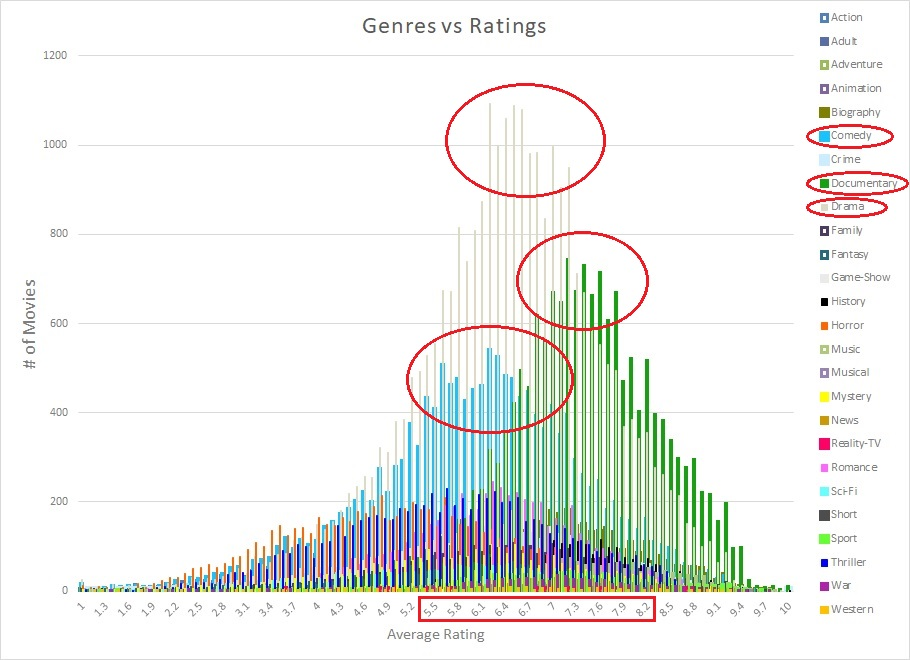

Fig. 1a: This reflects the genres and ratings data from "df_gen_rat_concat". Among the three top performing genres are: Drama, Documentary, and Comedy. These three genres displayed the most amount of movies within their category, along with medium to high ratings. 

In [73]:
q3, q1 = np.percentile(df_gen_rat_concat["numvotes"], [75 ,25])
iqr = q3 - q1
iqr

493.0

In [74]:
q3

511.0

In [75]:
q1

18.0

In [76]:
493*1.5

739.5

In [77]:
739.5+511.0 #added 1.5*IQR to Q3

1250.5

In [78]:
18-739.5 #subtract 1.5*IQR from Q1

-721.5

So regarding "numvotes", any numvote count < -721.5 and > 1250.5 are outliers.

In [79]:
q3, q1 = np.percentile(df_gen_rat_concat["runtime_minutes"], [75 ,25])
iqr = q3 - q1
iqr

23.0

In [80]:
q3

105.0

In [81]:
q1

82.0

In [82]:
23*1.5

34.5

In [83]:
82-34.5

47.5

In [84]:
105+34.5

139.5

So regarding "runtime_minutes", any runtime < 47.5 and > 139.5 are outliers.

According to these calculations, we will try and remove those suspected outliers.

In [85]:
df_gen_rat_rm_1 = df_gen_rat_concat[df_gen_rat_concat["numvotes"] <= 1250]
df_gen_rat_rm_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98897 entries, 0 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           98897 non-null  object 
 1   movie            98897 non-null  object 
 2   original_title   98897 non-null  object 
 3   start_year       98897 non-null  int64  
 4   runtime_minutes  98897 non-null  int32  
 5   genres           98897 non-null  object 
 6   averagerating    98897 non-null  float64
 7   numvotes         98897 non-null  int64  
 8   genre            98897 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 7.2+ MB


In [86]:
df_gen_rat_rm_2 = df_gen_rat_rm_1[df_gen_rat_rm_1["runtime_minutes"] <= 139]
df_gen_rat_rm_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95543 entries, 1 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           95543 non-null  object 
 1   movie            95543 non-null  object 
 2   original_title   95543 non-null  object 
 3   start_year       95543 non-null  int64  
 4   runtime_minutes  95543 non-null  int32  
 5   genres           95543 non-null  object 
 6   averagerating    95543 non-null  float64
 7   numvotes         95543 non-null  int64  
 8   genre            95543 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 6.9+ MB


In [87]:
df_gen_rat_rm_outliers = df_gen_rat_rm_2[df_gen_rat_rm_2["runtime_minutes"] >= 48]
df_gen_rat_rm_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93891 entries, 1 to 73829
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           93891 non-null  object 
 1   movie            93891 non-null  object 
 2   original_title   93891 non-null  object 
 3   start_year       93891 non-null  int64  
 4   runtime_minutes  93891 non-null  int32  
 5   genres           93891 non-null  object 
 6   averagerating    93891 non-null  float64
 7   numvotes         93891 non-null  int64  
 8   genre            93891 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 6.8+ MB


In [88]:
df_gen_rat_rm_outliers.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,93891.000000,93891.000000,93891.000000,93891.000000
mean,2014.215282,90.569256,6.282158,162.303682
std,2.560844,17.434477,1.498415,250.371141
min,2010.000000,48.000000,1.000000,5.000000
25%,2012.000000,80.000000,5.400000,15.000000
50%,2014.000000,90.000000,6.400000,47.000000
75%,2016.000000,100.000000,7.300000,190.000000
max,2019.000000,139.000000,10.000000,1250.000000


In [89]:
#df_gen_rat_rm_outliers.to_excel("df_gen_rat_rm_outliers.xlsx", index=False)

After removing the outliers and after exporting to excel and plotting a pivot chart in excel to create a clustered column graph, (as a comparison between different genres and its distribution throughout the rating scale), this is what resulted:

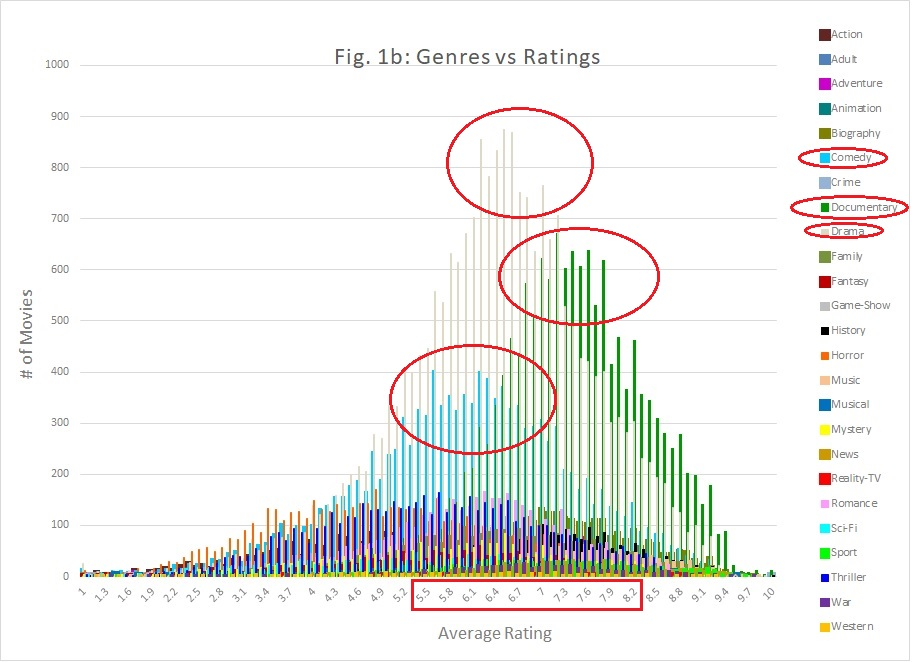

Fig. 1b: This plot reflects the genres and ratings data from "df_gen_rat_rm_outliers". Among the three top performing genres are still: Drama, Documentary, and Comedy. These three genres displayed the most amount of movies within their category, along with medium to high ratings. 

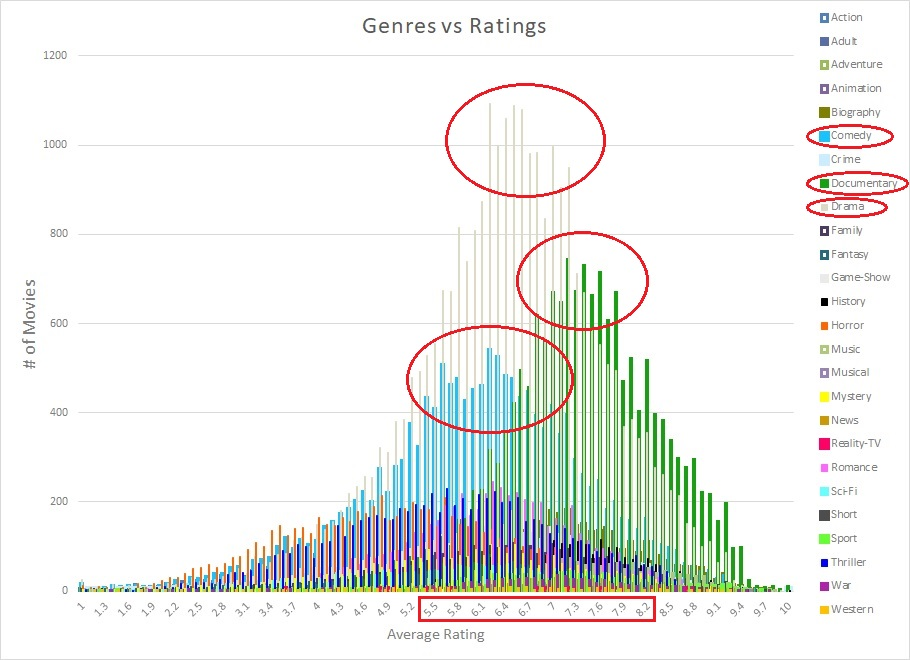

In [90]:
import pandas as pd
df_gen_rat_concat_unique_genres = df_gen_rat_concat["genre"].unique()
print(sorted(df_gen_rat_concat_unique_genres))

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [91]:
len(sorted(df_gen_rat_concat_unique_genres))

26

In [92]:
import pandas as pd
df_gen_rat_rm_outliers_unique_genres = df_gen_rat_rm_outliers["genre"].unique()
print(sorted(df_gen_rat_rm_outliers_unique_genres))

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [93]:
len(sorted(df_gen_rat_rm_outliers_unique_genres))

25

Seems like we did lose one genre: "Short". However, there seems to be little judging from the fact that the top 3 genres are held constant: "Drama", "Documentary", and "Comedy", with ranges remaining constant as well.


"Drama" - peaking at 6.4-7.3, with over 1000 movies in that category


"Documentary" - peaking at 7.3-8.0, with over 600 movies in that category


"Comedy" - peaking at 6.1-6.7, with over 400 movies in that category

Now, we must compare the results from the genres vs ratings data from "df_gen_bud_rat_concat" and find out if they are consistent with our current findings.

In [94]:
#df_gen_bud_rat_concat.to_excel("df_gen_bud_rat_concat.xlsx", index=False)

And after exporting into excel to create the pivot plot, here is the resulting clustered column figure:
Note: There figure depicts the genre vs rating data derived "df_gen_bud_rat_concat" and has not had any outliers removed or any other data exploration.

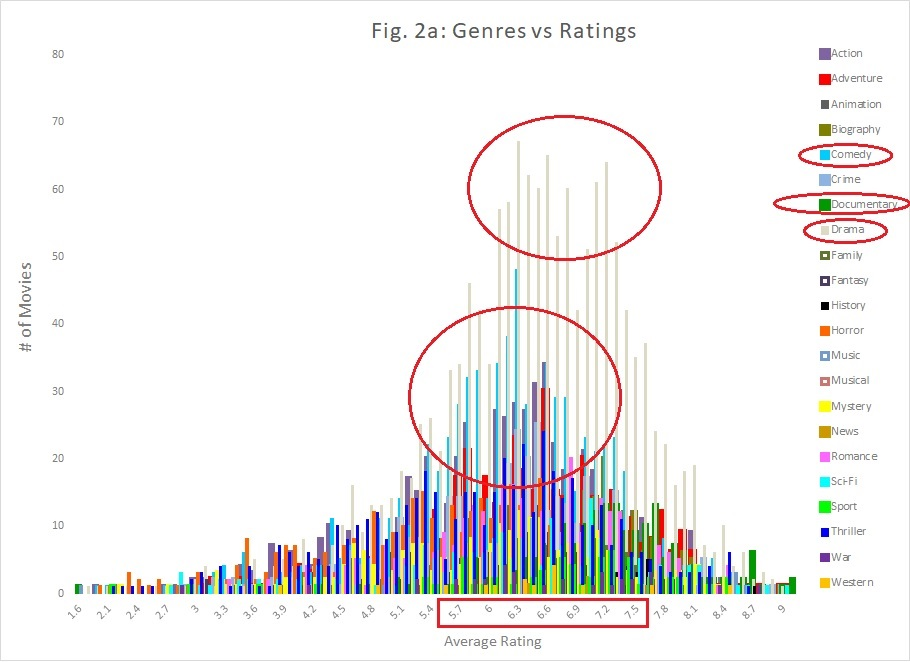

Fig. 2a: The plot reflects "drama" still to be among the top genres. However, "comedy" seems to have barely distinguished itself above the group of genres that include: "Action", "Adventure", "Crime". And the "Documentary", visible in the classic green, is still has a 6.9, 7.2 peak zone, it has barely over 10 movies--casting it awfully in the shadow of the group of genres mentioned before.

We would in the next step have to remove similar outliers as we did for the previous "df_gen_rat_rm_outliers" data frame.

In [95]:
df_gen_bud_rat_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6293 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             6293 non-null   object 
 1   movie              6293 non-null   object 
 2   original_title     6293 non-null   object 
 3   start_year         6293 non-null   int64  
 4   runtime_minutes    6293 non-null   int32  
 5   genres             6293 non-null   object 
 6   averagerating      6293 non-null   float64
 7   numvotes           6293 non-null   int64  
 8   id                 6293 non-null   int64  
 9   release_date       6293 non-null   object 
 10  production_budget  6293 non-null   object 
 11  domestic_gross     6293 non-null   object 
 12  worldwide_gross    6293 non-null   object 
 13  genre              6293 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 712.9+ KB


In [96]:
df_gen_bud_rat_concat.describe()

,start_year,runtime_minutes,averagerating,numvotes,id
count,6293.000000,6293.00000,6293.000000,6.293000e+03,6293.000000
mean,2013.891785,104.71222,6.251438,8.255814e+04,51.225012
std,2.533667,19.75619,1.131486,1.467730e+05,28.738704
min,2010.000000,3.00000,1.600000,5.000000e+00,1.000000
25%,2012.000000,92.00000,5.600000,7.600000e+02,27.000000
50%,2014.000000,103.00000,6.400000,2.371100e+04,51.000000
75%,2016.000000,115.00000,7.000000,9.638800e+04,76.000000
max,2019.000000,280.00000,9.200000,1.841066e+06,100.000000


In [97]:
q3, q1 = np.percentile(df_gen_bud_rat_concat["numvotes"], [75 ,25])
iqr = q3 - q1
iqr

95628.0

In [98]:
q3

96388.0

In [99]:
q1

760.0

In [100]:
760*1.5

1140.0

In [101]:
1140+96388 #added 1.5*IQR to Q3

97528

In [102]:
760-1140 #subtract 1.5*IQR from Q1

-380

So regarding "numvotes", any numvote count < -380 and > 97528 are outliers.

In [103]:
q3, q1 = np.percentile(df_gen_bud_rat_concat["runtime_minutes"], [75 ,25])
iqr = q3 - q1
iqr

23.0

In [104]:
q3

115.0

In [105]:
q1

92.0

In [106]:
23*1.5

34.5

In [107]:
92-34.5

57.5

In [108]:
115+34.5

149.5

So regarding "runtime_minutes", any runtime < 57.5 and > 149.5 are outliers.

According to these calculations, we will try and remove those suspected outliers from "df_gen_bud_rat_concat".

In [109]:
df_gen_bud_rat_rm_1 = df_gen_bud_rat_concat[df_gen_bud_rat_concat["numvotes"] <= 97528]
df_gen_bud_rat_rm_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4728 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             4728 non-null   object 
 1   movie              4728 non-null   object 
 2   original_title     4728 non-null   object 
 3   start_year         4728 non-null   int64  
 4   runtime_minutes    4728 non-null   int32  
 5   genres             4728 non-null   object 
 6   averagerating      4728 non-null   float64
 7   numvotes           4728 non-null   int64  
 8   id                 4728 non-null   int64  
 9   release_date       4728 non-null   object 
 10  production_budget  4728 non-null   object 
 11  domestic_gross     4728 non-null   object 
 12  worldwide_gross    4728 non-null   object 
 13  genre              4728 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 535.6+ KB


In [110]:
df_gen_bud_rat_rm_2 = df_gen_bud_rat_rm_1[df_gen_bud_rat_rm_1["runtime_minutes"] <= 149.5]
df_gen_bud_rat_rm_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             4626 non-null   object 
 1   movie              4626 non-null   object 
 2   original_title     4626 non-null   object 
 3   start_year         4626 non-null   int64  
 4   runtime_minutes    4626 non-null   int32  
 5   genres             4626 non-null   object 
 6   averagerating      4626 non-null   float64
 7   numvotes           4626 non-null   int64  
 8   id                 4626 non-null   int64  
 9   release_date       4626 non-null   object 
 10  production_budget  4626 non-null   object 
 11  domestic_gross     4626 non-null   object 
 12  worldwide_gross    4626 non-null   object 
 13  genre              4626 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 524.0+ KB


In [111]:
df_gen_bud_rat_concat_rm_outliers = df_gen_bud_rat_rm_2[df_gen_bud_rat_rm_2["runtime_minutes"] >= 57.5]
df_gen_bud_rat_concat_rm_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             4559 non-null   object 
 1   movie              4559 non-null   object 
 2   original_title     4559 non-null   object 
 3   start_year         4559 non-null   int64  
 4   runtime_minutes    4559 non-null   int32  
 5   genres             4559 non-null   object 
 6   averagerating      4559 non-null   float64
 7   numvotes           4559 non-null   int64  
 8   id                 4559 non-null   int64  
 9   release_date       4559 non-null   object 
 10  production_budget  4559 non-null   object 
 11  domestic_gross     4559 non-null   object 
 12  worldwide_gross    4559 non-null   object 
 13  genre              4559 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 516.4+ KB


In [112]:
df_gen_bud_rat_concat_rm_outliers.describe()

,start_year,runtime_minutes,averagerating,numvotes,id
count,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000
mean,2013.979381,100.317175,6.005549,22027.550559,51.217372
std,2.575497,15.287255,1.137853,28099.513028,28.746336
min,2010.000000,58.000000,1.600000,5.000000,1.000000
25%,2012.000000,90.000000,5.400000,294.500000,26.000000
50%,2014.000000,99.000000,6.100000,6996.000000,51.000000
75%,2016.000000,110.000000,6.800000,38731.000000,76.000000
max,2019.000000,148.000000,9.200000,97393.000000,100.000000


In [113]:
df_gen_bud_rat_concat_rm_outliers.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
0,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,"$45,000,000",$0,"$73,706",Action
1,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Adventure
2,tt4339118,On the Road,On the Road,2014,89,Drama,6.0,6,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
3,tt5647250,On the Road,On the Road,2016,121,Drama,5.7,127,17,22-Mar-13,"$25,000,000","$720,828","$9,313,302",Drama
7,tt0376136,The Rum Diary,The Rum Diary,2011,119,"Comedy,Drama",6.2,94787,16,28-Oct-11,"$45,000,000","$13,109,815","$21,544,732",Comedy


In [114]:
#df_gen_bud_rat_concat_rm_outliers.to_excel("df_gen_bud_rat_concat_rm_outliers.xlsx", index=False)

This is the resulting plot of genres vs ratings from removing the outliers from the "df_gen_bud_rat_concat" :

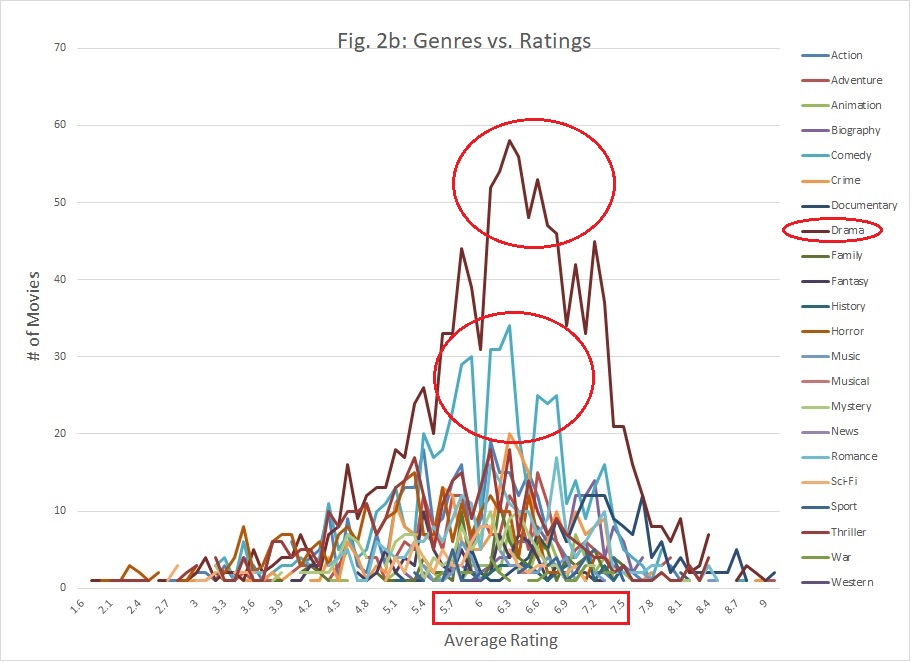

Fig. 2b: The plot reflects "Drama" still to be among the top genres. "Comedy" is depicted to have a close second. 

Now, let's see why the "Documentary" genre seems to have disappeared in our "df_gen_bud_rat_concat_rm_outliers" data frame.

In [115]:
gen_rat_documentary = df_gen_rat_rm_outliers.loc[df_gen_rat_rm_outliers["genre"] == "Documentary"]
gen_rat_documentary["start_year"].value_counts()

2015    1803
2014    1796
2016    1756
2013    1696
2017    1692
2012    1640
2011    1546
2010    1395
2018    1260
2019     323
Name: start_year, dtype: int64

In [116]:
gen_rat_documentary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14907 entries, 11 to 72755
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           14907 non-null  object 
 1   movie            14907 non-null  object 
 2   original_title   14907 non-null  object 
 3   start_year       14907 non-null  int64  
 4   runtime_minutes  14907 non-null  int32  
 5   genres           14907 non-null  object 
 6   averagerating    14907 non-null  float64
 7   numvotes         14907 non-null  int64  
 8   genre            14907 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 1.1+ MB


In [117]:
gen_rat_bud_rat_documentary = df_gen_bud_rat_concat_rm_outliers.loc[df_gen_bud_rat_concat_rm_outliers["genre"] == "Documentary"]
gen_rat_bud_rat_documentary["start_year"].value_counts()

2014    29
2015    25
2013    24
2010    18
2017    18
2011    15
2016    15
2012    14
2018    10
2019     4
Name: start_year, dtype: int64

In [118]:
gen_rat_bud_rat_documentary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 22 to 2636
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             172 non-null    object 
 1   movie              172 non-null    object 
 2   original_title     172 non-null    object 
 3   start_year         172 non-null    int64  
 4   runtime_minutes    172 non-null    int32  
 5   genres             172 non-null    object 
 6   averagerating      172 non-null    float64
 7   numvotes           172 non-null    int64  
 8   id                 172 non-null    int64  
 9   release_date       172 non-null    object 
 10  production_budget  172 non-null    object 
 11  domestic_gross     172 non-null    object 
 12  worldwide_gross    172 non-null    object 
 13  genre              172 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 19.5+ KB


#### Summary - Genres vs Ratings:

So far, we have found the genres "Drama", "Documentary", and "Comedy" to be among the top performing genres in acquiring mid to high ratings (5.5 - 8.2). However, upon a closer look, it would appear there is many times fewer entries in "df_gen_bud_rat_concat_rm_outliers" for "Documentary", which is most likely a bias of not enough data (not much different to having too small a sample size in an experiment).  
-POSSIBLE FUTURE RESEARCH-

However challenging this small data set for budget may be, there is still the necessity to remove those entries that simply are not profitable movies. 
--And that, will also diminish the already modest number of entries we have for our disposal.

#### Movie Margins

We have to first add margins data into the data frame.

###### Note: Critical Error in Cleaning: We have not cleaned "df_gen_bud_rat_concat" yet to clean the "production_budget", "domestic_gross", and "worldwide_gross" entries and make them into integers. 

In [119]:
df_budgets = df_gen_bud_rat_concat_rm_outliers.copy()

In [120]:
df_budgets["production_budget"] = df_budgets["production_budget"].str.replace("$", "").str.replace(",", "")
df_budgets["production_budget"]

<ipython-input-120-94f70cc72f32>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_budgets["production_budget"] = df_budgets["production_budget"].str.replace("$", "").str.replace(",", "")


0       45000000 
1       25000000 
2       25000000 
3       25000000 
7       45000000 
          ...    
2731    20000000 
2734        7000 
2735     8500000 
2739     9000000 
2741    15000000 
Name: production_budget, Length: 4559, dtype: object

In [121]:
df_budgets["production_budget"] = df_budgets["production_budget"].astype(int)

In [122]:
df_budgets["domestic_gross"] = df_budgets["domestic_gross"].str.replace("$", "").str.replace(",", "")
df_budgets["domestic_gross"]

<ipython-input-122-b0067fe6f2c4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_budgets["domestic_gross"] = df_budgets["domestic_gross"].str.replace("$", "").str.replace(",", "")


0              0 
1         720828 
2         720828 
3         720828 
7       13109815 
          ...    
2731    54611903 
2734           0 
2735    30376755 
2739    28051045 
2741           0 
Name: domestic_gross, Length: 4559, dtype: object

In [123]:
df_budgets["domestic_gross"] = df_budgets["domestic_gross"].astype(int)

In [124]:
df_budgets["worldwide_gross"] = df_budgets["worldwide_gross"].str.replace("$", "").str.replace(",", "")
df_budgets["worldwide_gross"]

<ipython-input-124-d5a00b5351ff>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_budgets["worldwide_gross"] = df_budgets["worldwide_gross"].str.replace("$", "").str.replace(",", "")


0           73706 
1         9313302 
2         9313302 
3         9313302 
7        21544732 
           ...    
2731     69911903 
2734            0 
2735    122747755 
2739     64179495 
2741            0 
Name: worldwide_gross, Length: 4559, dtype: object

In [125]:
df_budgets["worldwide_gross"] = df_budgets["worldwide_gross"].astype("int64")

In [126]:
df_budgets.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre
0,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,45000000,0,73706,Action
1,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,25000000,720828,9313302,Adventure
2,tt4339118,On the Road,On the Road,2014,89,Drama,6.0,6,17,22-Mar-13,25000000,720828,9313302,Drama
3,tt5647250,On the Road,On the Road,2016,121,Drama,5.7,127,17,22-Mar-13,25000000,720828,9313302,Drama
7,tt0376136,The Rum Diary,The Rum Diary,2011,119,"Comedy,Drama",6.2,94787,16,28-Oct-11,45000000,13109815,21544732,Comedy


In [127]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             4559 non-null   object 
 1   movie              4559 non-null   object 
 2   original_title     4559 non-null   object 
 3   start_year         4559 non-null   int64  
 4   runtime_minutes    4559 non-null   int32  
 5   genres             4559 non-null   object 
 6   averagerating      4559 non-null   float64
 7   numvotes           4559 non-null   int64  
 8   id                 4559 non-null   int64  
 9   release_date       4559 non-null   object 
 10  production_budget  4559 non-null   int32  
 11  domestic_gross     4559 non-null   int32  
 12  worldwide_gross    4559 non-null   int64  
 13  genre              4559 non-null   object 
dtypes: float64(1), int32(3), int64(4), object(6)
memory usage: 480.8+ KB


In [128]:
df_gen_bud_rat_budgets = df_budgets.copy()
df_gen_bud_rat_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559 entries, 0 to 2741
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             4559 non-null   object 
 1   movie              4559 non-null   object 
 2   original_title     4559 non-null   object 
 3   start_year         4559 non-null   int64  
 4   runtime_minutes    4559 non-null   int32  
 5   genres             4559 non-null   object 
 6   averagerating      4559 non-null   float64
 7   numvotes           4559 non-null   int64  
 8   id                 4559 non-null   int64  
 9   release_date       4559 non-null   object 
 10  production_budget  4559 non-null   int32  
 11  domestic_gross     4559 non-null   int32  
 12  worldwide_gross    4559 non-null   int64  
 13  genre              4559 non-null   object 
dtypes: float64(1), int32(3), int64(4), object(6)
memory usage: 480.8+ KB


In [129]:
df_gen_bud_rat_margins = df_gen_bud_rat_budgets.copy()
df_gen_bud_rat_margins["domestic_margins_percentage"] = (((df_gen_bud_rat_margins["domestic_gross"])-(df_gen_bud_rat_margins["production_budget"]))
                                                               /(df_gen_bud_rat_margins["domestic_gross"]))*100
df_gen_bud_rat_margins["worldwide_margins_percentage"] = (((df_gen_bud_rat_margins["worldwide_gross"])-(df_gen_bud_rat_margins["production_budget"]))
                                                                /(df_gen_bud_rat_margins["worldwide_gross"]))*100
df_gen_bud_rat_margins = df_gen_bud_rat_margins.reset_index()
df_gen_bud_rat_margins
df_gen_bud_rat_margins = df_gen_bud_rat_margins.drop(columns=["index"])
df_gen_bud_rat_margins.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre,domestic_margins_percentage,worldwide_margins_percentage
0,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",1.9,8248,26,31-Dec-12,45000000,0,73706,Action,-inf,-60953.374216
1,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",6.1,37886,17,22-Mar-13,25000000,720828,9313302,Adventure,-3368.233753,-168.433258
2,tt4339118,On the Road,On the Road,2014,89,Drama,6.0,6,17,22-Mar-13,25000000,720828,9313302,Drama,-3368.233753,-168.433258
3,tt5647250,On the Road,On the Road,2016,121,Drama,5.7,127,17,22-Mar-13,25000000,720828,9313302,Drama,-3368.233753,-168.433258
4,tt0376136,The Rum Diary,The Rum Diary,2011,119,"Comedy,Drama",6.2,94787,16,28-Oct-11,45000000,13109815,21544732,Comedy,-243.254272,-108.867764


However, there are so many negative margins. Those entries need to be removed.

In [130]:
df_gen_bud_rat_mar_mar1 = df_gen_bud_rat_margins.loc[df_gen_bud_rat_margins["domestic_margins_percentage"] > 0]
df_gen_bud_rat_mar_mar1.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre,domestic_margins_percentage,worldwide_margins_percentage
5,tt0383010,The Three Stooges,The Three Stooges,2012,92,"Comedy,Family",5.1,28570,4,13-Apr-12,30000000,44338224,54052249,Comedy,32.338291,44.498147
7,tt0403935,Action Jackson,Action Jackson,2014,144,"Action,Thriller",3.3,2862,8,12-Feb-88,7000000,20257000,20257000,Action,65.444044,65.444044
8,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114,Comedy,5.9,91546,51,30-Jul-10,69000000,73026337,86796502,Comedy,5.513541,20.503709
9,tt0431021,The Possession,The Possession,2012,92,"Horror,Mystery,Thriller",5.9,53649,81,31-Aug-12,14000000,49130588,82925064,Horror,71.504514,83.117288
14,tt4028068,Wonder Woman,Wonder Woman,2014,60,Sci-Fi,4.2,20,55,2-Jun-17,150000000,412563408,821133378,Sci-Fi,63.641952,81.732566


In [131]:
df_gen_bud_rat_mar_mar2 = df_gen_bud_rat_mar_mar1.loc[df_gen_bud_rat_mar_mar1["worldwide_margins_percentage"] > 0]
df_gen_bud_rat_mar_mar2.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre,domestic_margins_percentage,worldwide_margins_percentage
5,tt0383010,The Three Stooges,The Three Stooges,2012,92,"Comedy,Family",5.1,28570,4,13-Apr-12,30000000,44338224,54052249,Comedy,32.338291,44.498147
7,tt0403935,Action Jackson,Action Jackson,2014,144,"Action,Thriller",3.3,2862,8,12-Feb-88,7000000,20257000,20257000,Action,65.444044,65.444044
8,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114,Comedy,5.9,91546,51,30-Jul-10,69000000,73026337,86796502,Comedy,5.513541,20.503709
9,tt0431021,The Possession,The Possession,2012,92,"Horror,Mystery,Thriller",5.9,53649,81,31-Aug-12,14000000,49130588,82925064,Horror,71.504514,83.117288
14,tt4028068,Wonder Woman,Wonder Woman,2014,60,Sci-Fi,4.2,20,55,2-Jun-17,150000000,412563408,821133378,Sci-Fi,63.641952,81.732566


In [132]:
df_gen_bud_rat_0plus_margins = df_gen_bud_rat_mar_mar2.copy()
df_gen_bud_rat_0plus_margins.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,genre,domestic_margins_percentage,worldwide_margins_percentage
5,tt0383010,The Three Stooges,The Three Stooges,2012,92,"Comedy,Family",5.1,28570,4,13-Apr-12,30000000,44338224,54052249,Comedy,32.338291,44.498147
7,tt0403935,Action Jackson,Action Jackson,2014,144,"Action,Thriller",3.3,2862,8,12-Feb-88,7000000,20257000,20257000,Action,65.444044,65.444044
8,tt0427152,Dinner for Schmucks,Dinner for Schmucks,2010,114,Comedy,5.9,91546,51,30-Jul-10,69000000,73026337,86796502,Comedy,5.513541,20.503709
9,tt0431021,The Possession,The Possession,2012,92,"Horror,Mystery,Thriller",5.9,53649,81,31-Aug-12,14000000,49130588,82925064,Horror,71.504514,83.117288
14,tt4028068,Wonder Woman,Wonder Woman,2014,60,Sci-Fi,4.2,20,55,2-Jun-17,150000000,412563408,821133378,Sci-Fi,63.641952,81.732566


Exporting to excel to plot this to a chart.

In [133]:
#df_gen_bud_rat_0plus_margins.to_excel("df_gen_bud_rat_0plus_margins.xlsx", index=False)

Here's the resulting plot on the different genres and their corresponding profit margins:

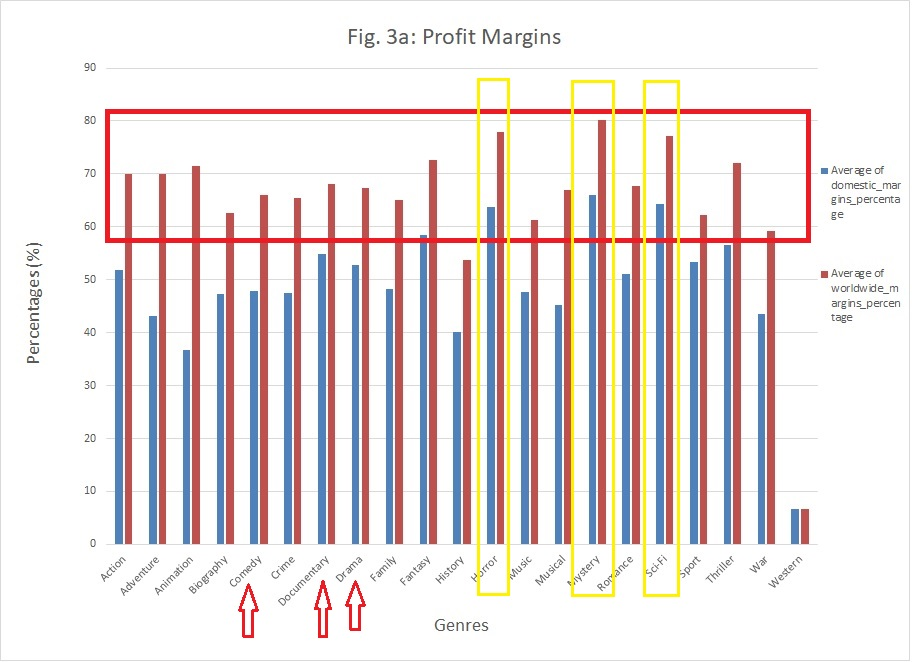

None of the three genres, "Drama", "Documentary", and "Comedy" were among the top genres to yield 60% profit margins in both domestic and worldwide markets. In actuality, it was "Mystery" leading the top 3, followed by "Sci-Fi" and "Horror" practically, neck-in-neck. So "Sci-Fi" and "Horror", we will deem as tied.

In [134]:
df_gen_bud_rat_0plus_margins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 5 to 4557
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tconst                        1537 non-null   object 
 1   movie                         1537 non-null   object 
 2   original_title                1537 non-null   object 
 3   start_year                    1537 non-null   int64  
 4   runtime_minutes               1537 non-null   int32  
 5   genres                        1537 non-null   object 
 6   averagerating                 1537 non-null   float64
 7   numvotes                      1537 non-null   int64  
 8   id                            1537 non-null   int64  
 9   release_date                  1537 non-null   object 
 10  production_budget             1537 non-null   int32  
 11  domestic_gross                1537 non-null   int32  
 12  worldwide_gross               1537 non-null   int64  
 13  gen

#### Summary - Genres and Profit Margins

To have such a switch up where "Drama", "Documentary", and "Comedy" are not even in the top performing genres suggests that this data set may not be adequate. We have to keep in mind that we had many times less entries for the "df_gen_bud_rat_0plus_margins" data frame than the "df_gen_rat_rm_outliers" 93891 entries to "df_gen_bud_rat_0plus_margins" 1537 entries. 

So, future research may include analyzing from the same data set to avoid these discrepancies based on differences in entry count.
-POSSIBLE FUTURE RESEARCH-

## Conclusions:

So far, we have found the genres "Drama", "Documentary", and "Comedy" to be among the top performing genres in acquiring mid to high ratings (5.5 - 8.2). However, upon a closer look, it would appear there is many times fewer entries in "df_gen_bud_rat_concat_rm_outliers" for "Documentary", which is most likely a bias of not enough data (not much different to having too small a sample size in an experiment).  


With regards to the genres that yielded the greatest profit margins, it was "Mystery" leading the top 3, followed by "Sci-Fi" and "Horror" practically, neck-in-neck. So "Sci-Fi" and "Horror", we will deem as tied.
To have such a switch up where "Drama", "Documentary", and "Comedy" are not even in the top performing genres suggests that this data set may not be adequate. We have to keep in mind that we had many times less entries for the "df_gen_bud_rat_0plus_margins" data frame than the "df_gen_rat_rm_outliers" 93891 entries to "df_gen_bud_rat_0plus_margins" 1537 entries.

So, future research may include analyzing from the same data set to avoid these discrepancies based on differences in entry count.

## Data Question - Answers:

1. Movies with high ratings fall into what movie genre?
   "Drama", "Documentary", and "Comedy". However, it is inconclusive since, there is not adequate data for the     
   budgets to really confirm this fact.



2. What movie genre generated the most profit (ROI)?
   With regards to the genres that yielded the greatest profit margins, it was "Mystery" leading the top 3, 
   followed by "Sci-Fi" and "Horror" practically, neck-in-neck. So "Sci-Fi" and "Horror", we will deem as tied. 
   
   However, as a caveat, this conclusion is inconclusive as well as the data set we derived this finding was deemed 
   inadequate to form a firm conclusion we can commit to. Therefore, the next steps would be acquire dataset with 
   deemed sufficient entries to perform this analysis again.


## Recommendations:

These findings led us to recommend more time to consider other movie data sources. As of now, our investigation indicates that "Drama", "Documentary", and "Comedy" are among those genres heavily recommended.
The following genres "Mystery", "Sci-Fi", and "Horror" should also be taken into consideration as these genres yielded the greatest profit margins from our investigation.